In [315]:
import quandl
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
plt.ion()
quandl.ApiConfig.api_key = 'k5hpQXTQmkr3f2cBYTDb'
companyNames = ['HBL','ABL','UBL','BOP']

data_frame = pd.DataFrame()

for names in companyNames:
    x = quandl.get('PSX/%s' %names, start_date='2011-1-1',
    end_date='2021-7-30')
    x['company'] = names
    data_frame = data_frame.append(x)

In [316]:
data_frame.reset_index(inplace=True)
data_frame['Year'] = pd.DatetimeIndex(data_frame['Date']).year
data_frame['Month'] = data_frame['Date'].dt.month_name().str[:3]
data_frame

,Date,Open,High,Low,Turnover,Close,company,Year,Month
0,2011-01-03,121.94,121.00,116.80,510969.0,121.94,HBL,2011,Jan
1,2011-01-04,119.49,122.30,119.50,627959.0,119.49,HBL,2011,Jan
2,2011-01-05,121.87,126.45,121.40,1506848.0,121.87,HBL,2011,Jan
3,2011-01-06,124.93,125.89,123.75,773913.0,124.93,HBL,2011,Jan
4,2011-01-07,124.98,126.06,124.69,376749.0,124.98,HBL,2011,Jan
...,...,...,...,...,...,...,...,...,...
10349,2021-07-26,8.26,8.35,8.17,1538000.0,8.21,BOP,2021,Jul
10350,2021-07-27,8.25,8.60,8.20,10885500.0,8.41,BOP,2021,Jul
10351,2021-07-28,8.48,8.48,8.25,2241000.0,8.28,BOP,2021,Jul
10352,2021-07-29,8.30,8.30,8.20,1400000.0,8.22,BOP,2021,Jul


In [317]:

df=data_frame
df['Price Change']=df['Open']-df['Close'].shift(1)
df['Daily Returns']=(df['Close'].shift(1)/df['Close'])-1
df['Percentage']=(df['Close']/df['Close'].sum())*100
df

,Date,Open,High,Low,Turnover,Close,company,Year,Month,Price Change,Daily Returns,Percentage
0,2011-01-03,121.94,121.00,116.80,510969.0,121.94,HBL,2011,Jan,NaN,NaN,0.011804
1,2011-01-04,119.49,122.30,119.50,627959.0,119.49,HBL,2011,Jan,-2.45,0.020504,0.011566
2,2011-01-05,121.87,126.45,121.40,1506848.0,121.87,HBL,2011,Jan,2.38,-0.019529,0.011797
3,2011-01-06,124.93,125.89,123.75,773913.0,124.93,HBL,2011,Jan,3.06,-0.024494,0.012093
4,2011-01-07,124.98,126.06,124.69,376749.0,124.98,HBL,2011,Jan,0.05,-0.000400,0.012098
...,...,...,...,...,...,...,...,...,...,...,...,...
10349,2021-07-26,8.26,8.35,8.17,1538000.0,8.21,BOP,2021,Jul,-0.01,0.007308,0.000795
10350,2021-07-27,8.25,8.60,8.20,10885500.0,8.41,BOP,2021,Jul,0.04,-0.023781,0.000814
10351,2021-07-28,8.48,8.48,8.25,2241000.0,8.28,BOP,2021,Jul,0.07,0.015700,0.000801
10352,2021-07-29,8.30,8.30,8.20,1400000.0,8.22,BOP,2021,Jul,0.02,0.007299,0.000796


In [318]:
HBL=df[df['company']=='HBL']
ABL=df[df['company']=='ABL']
UBL=df[df['company']=='UBL']
BOP=df[df['company']=='BOP']
HBL

,Date,Open,High,Low,Turnover,Close,company,Year,Month,Price Change,Daily Returns,Percentage
0,2011-01-03,121.94,121.00,116.80,510969.0,121.94,HBL,2011,Jan,NaN,NaN,0.011804
1,2011-01-04,119.49,122.30,119.50,627959.0,119.49,HBL,2011,Jan,-2.45,0.020504,0.011566
2,2011-01-05,121.87,126.45,121.40,1506848.0,121.87,HBL,2011,Jan,2.38,-0.019529,0.011797
3,2011-01-06,124.93,125.89,123.75,773913.0,124.93,HBL,2011,Jan,3.06,-0.024494,0.012093
4,2011-01-07,124.98,126.06,124.69,376749.0,124.98,HBL,2011,Jan,0.05,-0.000400,0.012098
...,...,...,...,...,...,...,...,...,...,...,...,...
2589,2021-07-26,129.98,130.45,128.10,607740.0,128.76,HBL,2021,Jul,0.67,0.004272,0.012464
2590,2021-07-27,127.80,131.95,127.80,2267549.0,131.31,HBL,2021,Jul,-0.96,-0.019420,0.012711
2591,2021-07-28,131.90,131.90,129.55,802489.0,130.80,HBL,2021,Jul,0.59,0.003899,0.012661
2592,2021-07-29,131.00,131.00,128.50,531104.0,128.93,HBL,2021,Jul,0.20,0.014504,0.012480


# 1

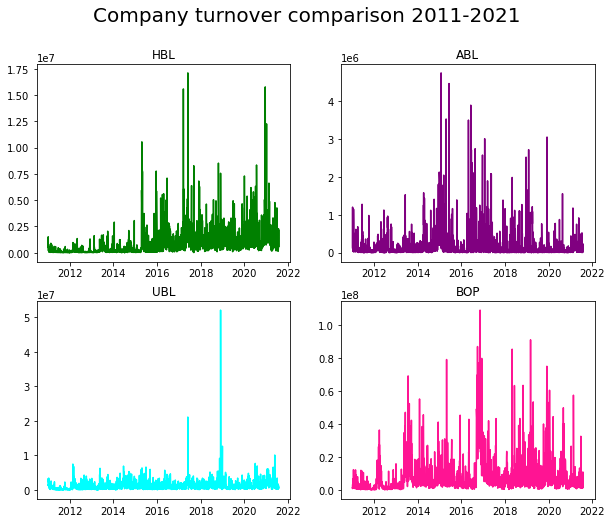

In [319]:
fig = plt.figure(figsize=(10,8))
fig.suptitle('Company turnover comparison 2011-2021', 
             fontsize=20)
ax1 = fig.add_subplot(221)
ax1.set_title('HBL')
ax1.plot(HBL['Date'],
         HBL['Turnover'], 
         color='green')

ax2 = fig.add_subplot(222)
ax2.set_title('ABL')

ax2.plot(ABL['Date'],
         ABL['Turnover'], 
         color='purple')

ax1 = fig.add_subplot(223)
ax1.set_title('UBL')
ax1.plot(UBL['Date'],
         UBL['Turnover'], 
         color='aqua')

ax2 = fig.add_subplot(224)
ax2.set_title('BOP')

ax2.plot(BOP['Date'],
         BOP['Turnover'], 
         color='deeppink')

# 2

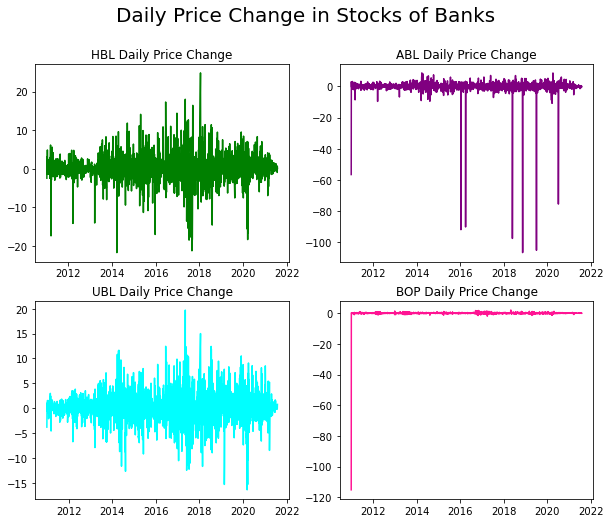

In [320]:
#HBL.plot(title="HBL Daily Price Change",x='Date',y='Price Change',ylabel="Price",color="green")
#ABL.plot(title="ABL Daily Price Change",x='Date',y='Price Change',ylabel="Price",color="purple")
#UBL.plot(title="UBL Daily Price Change",x='Date',y='Price Change',ylabel="Price",color="aqua")
#BOP.plot(title="BOP Daily Price Change",x='Date',y='Price Change',ylabel="Price",color="deeppink")

fig = plt.figure(figsize=(10,8))
fig.suptitle('Daily Price Change in Stocks of Banks', 
             fontsize=20)
ax1 = fig.add_subplot(221)
ax1.set_title('HBL Daily Price Change')
ax1.plot(HBL['Date'],
         HBL['Price Change'], 
         color='green')

ax2 = fig.add_subplot(222)
ax2.set_title('ABL Daily Price Change')

ax2.plot(ABL['Date'],
         ABL['Price Change'], 
         color='purple')

ax1 = fig.add_subplot(223)
ax1.set_title('UBL Daily Price Change')
ax1.plot(UBL['Date'],
         UBL['Price Change'], 
         color='aqua')

ax2 = fig.add_subplot(224)
ax2.set_title('BOP Daily Price Change')

ax2.plot(BOP['Date'],
         BOP['Price Change'], 
         color='deeppink')

# 3

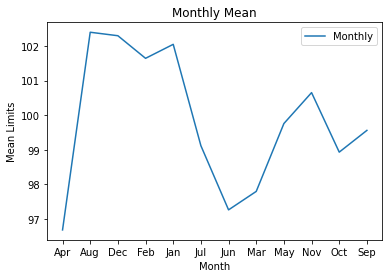

In [323]:
df_avgYear = df.groupby(df['Year'], as_index=True)['Close'].mean()
df_avg = df.groupby(df['Month'], as_index=True)['Close'].mean()
plt.plot(list(df_avg.index),list(df_avg), label='Monthly')
plt.title("Monthly Mean")
plt.ylabel("Mean Limits")
plt.xlabel("Month")
plt.legend()



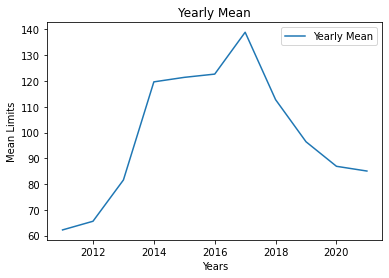

In [324]:
df_avgYear = df.groupby(df['Year'], as_index=True)['Close'].mean()
plt.plot(list(df_avgYear.index),list(df_avgYear), label='Yearly Mean')
plt.title("Yearly Mean")
plt.xlabel("Years")
plt.ylabel("Mean Limits")
plt.legend()

# 4

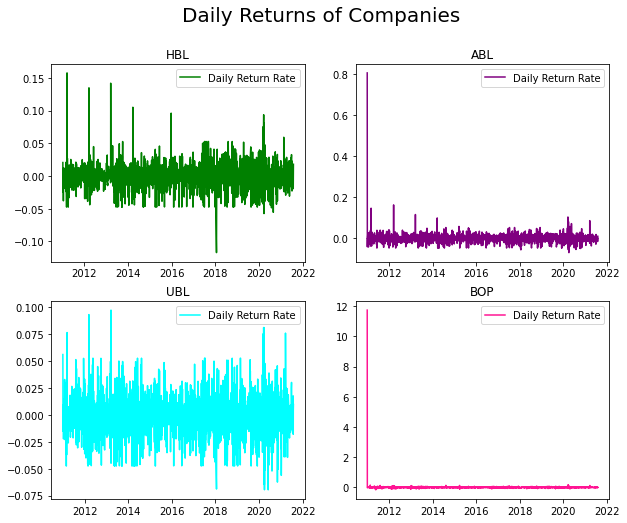

In [325]:
fig = plt.figure(figsize=(10,8))
fig.suptitle('Daily Returns of Companies', 
             fontsize=20)
ax1 = fig.add_subplot(221)
ax1.set_title('HBL')
ax1.plot(HBL['Date'],
         HBL['Daily Returns'], 
         color='green',label="Daily Return Rate")
ax1.legend()

ax2 = fig.add_subplot(222)
ax2.set_title('ABL')

ax2.plot(ABL['Date'],
         ABL['Daily Returns'], 
         color='purple',label="Daily Return Rate")
ax2.legend()

ax1 = fig.add_subplot(223)
ax1.set_title('UBL')
ax1.plot(UBL['Date'],
         UBL['Daily Returns'], 
         color='aqua',label="Daily Return Rate")
ax1.legend()

ax2 = fig.add_subplot(224)
ax2.set_title('BOP')

ax2.plot(BOP['Date'],
         BOP['Daily Returns'], 
         color='deeppink',label="Daily Return Rate")
ax2.legend()

# 5

In [327]:
print('HBL')
print("Worst and Best respective dates")
Temp=HBL['Daily Returns'].min()
df2=HBL.loc[df['Daily Returns'] == Temp]
print(df2['Date'].to_string(index=False))
Temp=HBL['Daily Returns'].max()
df2=HBL.loc[df['Daily Returns'] == Temp]
print(df2['Date'].to_string(index=False))

print('ABL')
print("Worst and Best respective dates")
Temp=ABL['Daily Returns'].min()
df2=ABL.loc[df['Daily Returns'] == Temp]
print(df2['Date'].to_string(index=False))
Temp=ABL['Daily Returns'].max()
df2=ABL.loc[df['Daily Returns'] == Temp]
print(df2['Date'].to_string(index=False))

print('UBL')
print("Worst and Best respective dates")
Temp=UBL['Daily Returns'].min()
df2=UBL.loc[df['Daily Returns'] == Temp]
print(df2['Date'].to_string(index=False))
Temp=UBL['Daily Returns'].max()
df2=UBL.loc[df['Daily Returns'] == Temp]
print(df2['Date'].to_string(index=False))

print('BOP')
print("Worst and Best respective dates")
Temp=BOP['Daily Returns'].min()
df2=BOP.loc[df['Daily Returns'] == Temp]
print(df2['Date'].to_string(index=False))
Temp=BOP['Daily Returns'].max()
df2=BOP.loc[df['Daily Returns'] == Temp]
print(df2['Date'].to_string(index=False))


HBL
Worst and Best respective dates
2018-01-19
2011-03-15
ABL
Worst and Best respective dates
2020-04-03
2011-01-03
UBL
Worst and Best respective dates
2020-06-03
2013-03-19
BOP
Worst and Best respective dates
2011-05-26
2011-01-03


# 6

In [328]:
a=HBL['Price Change'].std() 
b=ABL['Price Change'].std() 
c=UBL['Price Change'].std() 
d=BOP['Price Change'].std() 


Text(0, 0.5, 'SD')

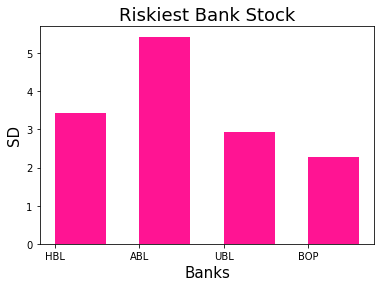

In [329]:
classes = ["HBL", "ABL", "UBL", "BOP"]
plt.bar(classes,[a,b,c,d] ,width = 0.6, align = "edge", color = "deeppink")

plt.title("Riskiest Bank Stock", fontsize = 18)
plt.xlabel("Banks",fontsize = 15)
plt.ylabel("SD", fontsize = 15)
#as you can see ABL is the riskiest as it is more varied

# 7

Text(0, 0.5, 'Close Price Frequency')

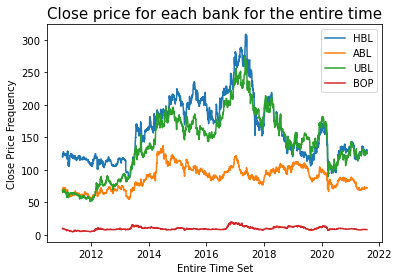

In [330]:
plt.plot(HBL["Date"], HBL['Close'], label='HBL')
plt.plot(ABL["Date"], ABL['Close'], label='ABL')
plt.plot(UBL["Date"], UBL['Close'], label='UBL')
plt.plot(BOP["Date"], BOP['Close'], label='BOP')
plt.legend()

plt.title("Close price for each bank for the entire time", fontsize = 15)
plt.xlabel("Entire Time Set",fontsize = 10)
plt.ylabel("Close Price Frequency", fontsize = 10)

# 8

1:

In [331]:
#colors = ['deeppink', 'aqua', 'magenta', 'silver']
a=HBL['Turnover'].std() 
b=ABL['Turnover'].std() 
c=UBL['Turnover'].std() 
d=BOP['Turnover'].std() 
data = [['HBL', a], ['ABL', b], ['UBL', c],['BOP', d]]
Tdff = pd.DataFrame(data, columns=['Company','Std'])
Tdff['Percentage']=(Tdff['Std']/Tdff['Std'].sum())*100
Tdff.round(2)


,Company,Std,Percentage
0,HBL,1336913.82,9.42
1,ABL,347589.50,2.45
2,UBL,1595823.69,11.24
3,BOP,10911216.42,76.89


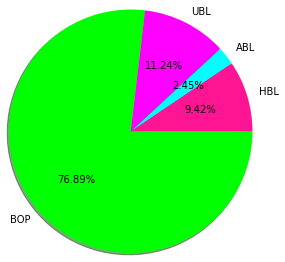

In [332]:

colors = ['deeppink', 'aqua', 'magenta', 'lime']
textprops = {"fontsize":10}

plt.pie(Tdff['Percentage'],labels = Tdff['Company'], colors=colors,                                                                                                                                                                                                                                                                                   
        autopct = "%0.2f%%", 
        shadow = True, 
        radius = 1.4,
        #startangle = 270, 
        textprops =textprops)
plt.show()

This upper pie chart shows each bank turnover rate standard deviation percentage. Since BOP bank percentage of variation is higher than the other banks. I can conclude that BOP has more varied data and is risker in terms of to maintain consistent stock rate.

2

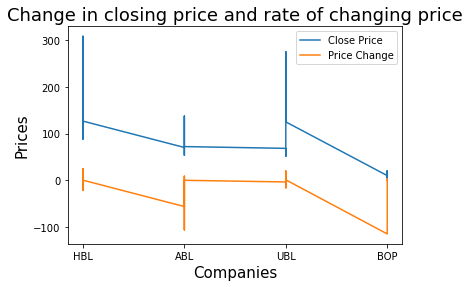

In [333]:
plt.plot(df["company"], df['Close'], label='Close Price')
plt.plot(df["company"], df['Price Change'], label='Price Change')
plt.legend()
plt.title("Change in closing price and rate of changing price", fontsize = 18)
plt.xlabel("Companies",fontsize = 15)
plt.ylabel("Prices", fontsize = 15)
plt.show()

This upper line graph shows the difference between different banks closing and rate of price stock increase or decrease.I can infer that where price change of BOP goes, its close price is right above few points.

In [ ]:
3:

<BarContainer object of 10354 artists>
<BarContainer object of 10354 artists>
<BarContainer object of 10354 artists>
<BarContainer object of 10354 artists>


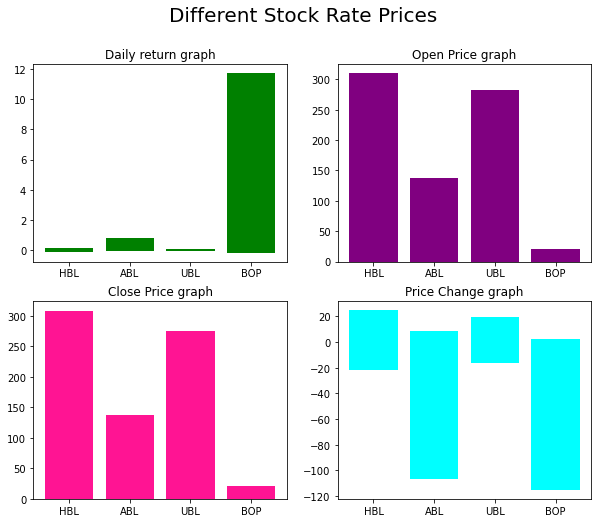

In [334]:
fig = plt.figure(figsize=(10,8))
fig.suptitle("Different Stock Rate Prices", 
             fontsize=20)
ax1 = fig.add_subplot(221)
ax1.set_title('Daily return graph')
ax1=plt.bar(df['company'],
         df['Daily Returns'], 
         color='green')
print(ax1)

ax2 = fig.add_subplot(222)
ax2.set_title('Open Price graph')
ax2=plt.bar(df['company'],
         df['Open'], 
         color='purple')
print(ax2)

ax1 = fig.add_subplot(223)
ax1.set_title('Close Price graph')
ax1=plt.bar(df['company'],
         df['Close'], 
         color='deeppink')
print(ax1)

ax2 = fig.add_subplot(224)
ax2.set_title('Price Change graph')
ax2=plt.bar(df['company'],
         df['Price Change'], 
         color='aqua')
print(ax2)

These above 4 subplots represent open,close,turnover and price change of stocks of each bank to see which bank is performing better in respective category.